# Basic statistics

In [42]:
import pandas as pd
path = f"/Users/teresa/Desktop/all_speeches.csv"
df = pd.read_csv(path)

## A bit of cleaning is needed:
- remove superflous columns
- harmonize country names

In [43]:
#removing superflous columns
df.drop(["Year", "Session","session", "index", "year_iso", "ISO Code", "Unnamed: 6", 'Unnamed: 0'], axis=1, inplace=True)

In [44]:
df.head(5)

,iso,year,speeches,Country,Name of Person Speaking,Post,order
0,BEL,1950,Never before have men throughout the world mor...,Belgium,Mr. VAN ZEELAND,NaN,10375.0
1,BLR,1950,It is now five years since the United Nations ...,Byelorussian Soviet Socialist Republic,Mr. KISELEV,NaN,10397.0
2,FRA,1950,"At the conclusion of this general discussion, ...",France,Mr. R. SCHUMAN,NaN,10391.0
3,PAK,1950,May I be permitted to congratulate the General...,Pakistan,Sir Mohammad ZAFRULLA KHAN,NaN,10386.0
4,TUR,1950,The era inaugurated by the creation of the Uni...,Turkey,Mr. SARPER,NaN,10382.0


In [45]:

iso_with_blank_country = df[df['Country'].isnull()]['iso']
print(iso_with_blank_country)

285      CAN
393      YMD
1343     YMD
1652     YMD
1676     GIN
        ... 
9417     DNK
9442     YMD
9852     YMD
10156    .DS
10376     EU
Name: iso, Length: 89, dtype: object


In [46]:
# Find ISO codes with multiple countries
duplicated_iso = df[df.duplicated(subset='iso', keep=False)]['iso']

# Filter the DataFrame for ISO codes with multiple countries
df_multiple_countries = df[df['iso'].isin(duplicated_iso)]

# Group by ISO code and get the unique countries
duplicated_countries_per_iso = df_multiple_countries.groupby('iso')['Country'].unique()

# Filter out lines with '.Rapp.history' and '.Rhistory'
duplicated_countries_per_iso = duplicated_countries_per_iso[~duplicated_countries_per_iso.index.str.startswith('.')]

# Extract the duplicated countries
duplicated_countries = duplicated_countries_per_iso.explode().dropna().unique()

# Create a list of tuples with ISO code and duplicated countries
iso_countries_list = list(zip(duplicated_iso, duplicated_countries_per_iso))

# Convert the list of tuples to a DataFrame
iso_countries_df = pd.DataFrame(iso_countries_list, columns=['ISO Code', 'Duplicated Countries'])


# Display the DataFrame
print(iso_countries_df)

total_iso_codes = df['iso'].nunique()

total_iso_codes


    ISO Code                               Duplicated Countries
0        BEL  [Afghanistan, Afganistan, Islamic Republic of ...
1        BLR              [Angola, Republic of Angola, Angola ]
2        FRA           [Albania, Republic of Albania, Albania ]
3        PAK  [Andorra, Principality of Andorra, Andorra , T...
4        TUR  [United Arab Emirates, UAE, United Arab Republ...
..       ...                                                ...
196      SVK                                              [nan]
197      NIC   [Yugoslavia, Yugoslavia , Serbia and Montenegro]
198      EGY  [Union of South Africa, South Africa, South Af...
199      NZL              [Zambia, Republic of Zambia, Zambia ]
200      CPV        [Zimbabwe, Republic of Zimbabwe, Zimbabwe ]

[201 rows x 2 columns]


204

In [47]:
# Iterate over the rows in the DataFrame
for index, row in df.iterrows():
    iso_code = row['iso']
    if iso_code == '.DS':
    # Drop the row if the ISO code is '.DS'
        df = df.drop(index)
    else:
        duplicated_countries = duplicated_countries_per_iso.get(iso_code)
        if duplicated_countries is not None:
        # Check if there are duplicated countries
            if len(duplicated_countries) > 1:
            # Perform specific replacements for certain ISO codes
                if iso_code == 'BLR':
                    df.loc[index, 'country'] = 'Belarus'
                elif iso_code == 'COG':
                    df.loc[index, 'country'] = 'Democratic Republic of Congo'
                elif iso_code == 'CZK' or iso_code == 'CSK':
                    df.loc[index, 'country'] = 'Czechoslovakia'
                elif iso_code == 'RUS':
                    df.loc[index, 'country'] = 'Russia'
                elif iso_code == 'UKR':
                    df.loc[index, 'country'] = 'Ukraine'
                else:
                    df.loc[index, 'country'] = duplicated_countries[0]
            else:
                df.loc[index, 'country'] = duplicated_countries[0]

df = df.rename(columns={'Country': 'country_dup'})

df.head(10)


,iso,year,speeches,country_dup,Name of Person Speaking,Post,order,country
0,BEL,1950,Never before have men throughout the world mor...,Belgium,Mr. VAN ZEELAND,NaN,10375.0,Belgium
1,BLR,1950,It is now five years since the United Nations ...,Byelorussian Soviet Socialist Republic,Mr. KISELEV,NaN,10397.0,Belarus
2,FRA,1950,"At the conclusion of this general discussion, ...",France,Mr. R. SCHUMAN,NaN,10391.0,France
3,PAK,1950,May I be permitted to congratulate the General...,Pakistan,Sir Mohammad ZAFRULLA KHAN,NaN,10386.0,Pakistan
4,TUR,1950,The era inaugurated by the creation of the Uni...,Turkey,Mr. SARPER,NaN,10382.0,Turkey
5,BRA,1950,Because I am the first representative to have ...,Brazil,Mr. de FREITAS VALLE,NaN,10363.0,Brazil
6,ETH,1950,"A year ago, when the fourth session of the Gen...",Ethiopia,Mr. AKLILOU,NaN,10406.0,Ethiopia
7,DOM,1950,Had the United Nations not been faced in its f...,Dominican Republic,Mr. DIAZ ORDONEZ,NaN,10376.0,Dominican Republic
8,URY,1950,The basic and dominant theme of this general d...,Uruguay,Mr. ARMAND UGON,NaN,10403.0,Uruguay
9,PAN,1950,"As head of the delegation of Panama, I have th...",Panama,Mr. BRIN,NaN,10400.0,Panama


In [48]:
country_per_year = df.groupby('year')['country'].unique()

In [49]:
#number of countries per year
num_country_by_year = country_per_year.apply(lambda x: len(x))
num_country_by_year

year
1946     39
1947     39
1948     39
1949     35
1950     44
       ... 
2017    196
2018    196
2019    195
2020    193
2021    194
Name: country, Length: 76, dtype: int64

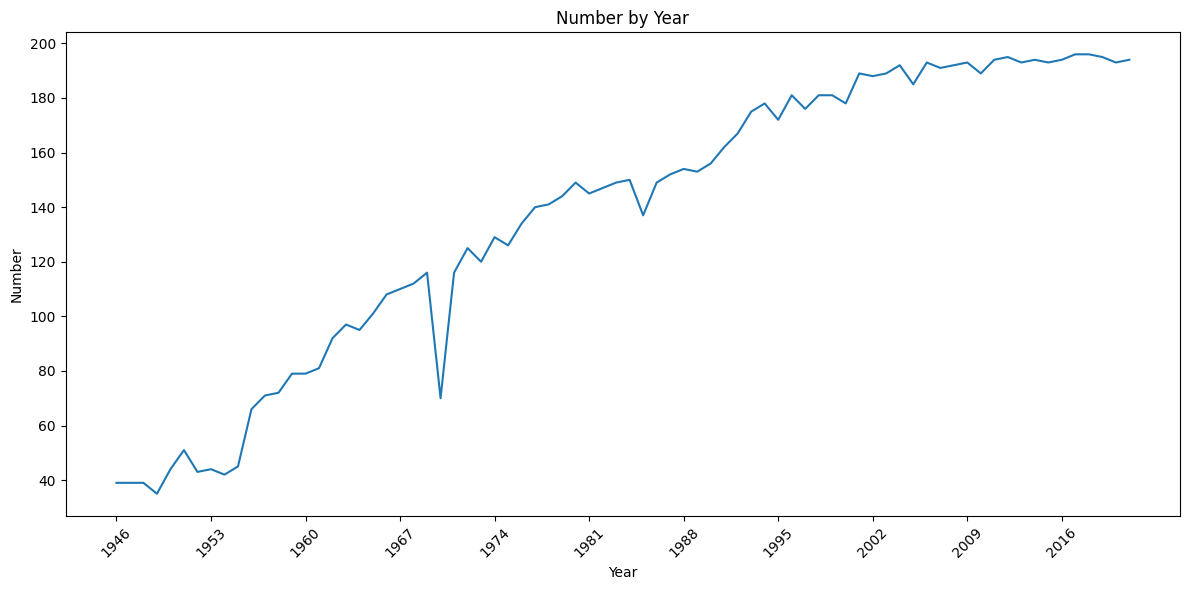

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
# Remove 'Store-to-UTF-8' from the series

# Set the figure size
plt.figure(figsize=(12, 6))

ax=sns.lineplot(x=num_country_by_year.index, y=num_country_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Number by Year')

# Rotate x-axis tick labels
plt.xticks(rotation=45)

# Set the number of x-axis ticks and their spacing
num_ticks = 10
x_ticks = range(0, len(speech_length_by_year.index), len(speech_length_by_year.index)//num_ticks)
x_labels = speech_length_by_year.index[x_ticks]
plt.xticks(x_ticks, x_labels)

plt.tight_layout()

plt.show()


In [51]:
df['speech_length'] = df['speeches'].str.len()  # Calculate the length of speeches and create a new column

# Group by year and calculate the average speech length
speech_length_by_year = df.groupby('year')['speech_length'].mean().round()
speech_length_by_year=speech_length_by_year.astype(int)

# Group by country and calculate the average speech length
speech_length_by_country = df.groupby('country')['speech_length'].mean().round()
speech_length_by_country=speech_length_by_country.astype(int)


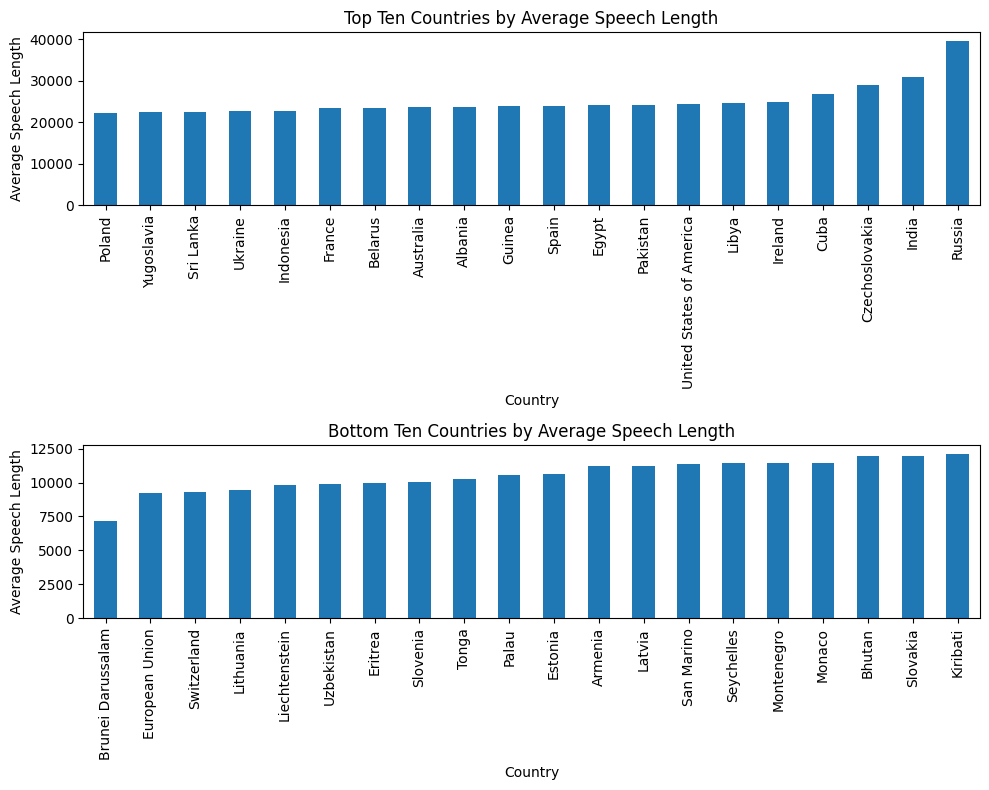

In [52]:
# Sorting the speech_length_by_country series in ascending order
sorted_speech_length_by_country = speech_length_by_country.sort_values()

# Selecting the top ten and bottom ten countries
top_20_countries = sorted_speech_length_by_country.tail(20)
bottom_20_countries = sorted_speech_length_by_country.head(20)

# Creating subplots for top ten and bottom ten countries
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plotting the top ten countries
top_20_countries.plot.bar(ax=axes[0])
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Average Speech Length')
axes[0].set_title('Top Ten Countries by Average Speech Length')

# Plotting the bottom ten countries
bottom_20_countries.plot.bar(ax=axes[1])
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Average Speech Length')
axes[1].set_title('Bottom Ten Countries by Average Speech Length')

# Adjusting the layout
plt.tight_layout()

# Displaying the plots
plt.show()

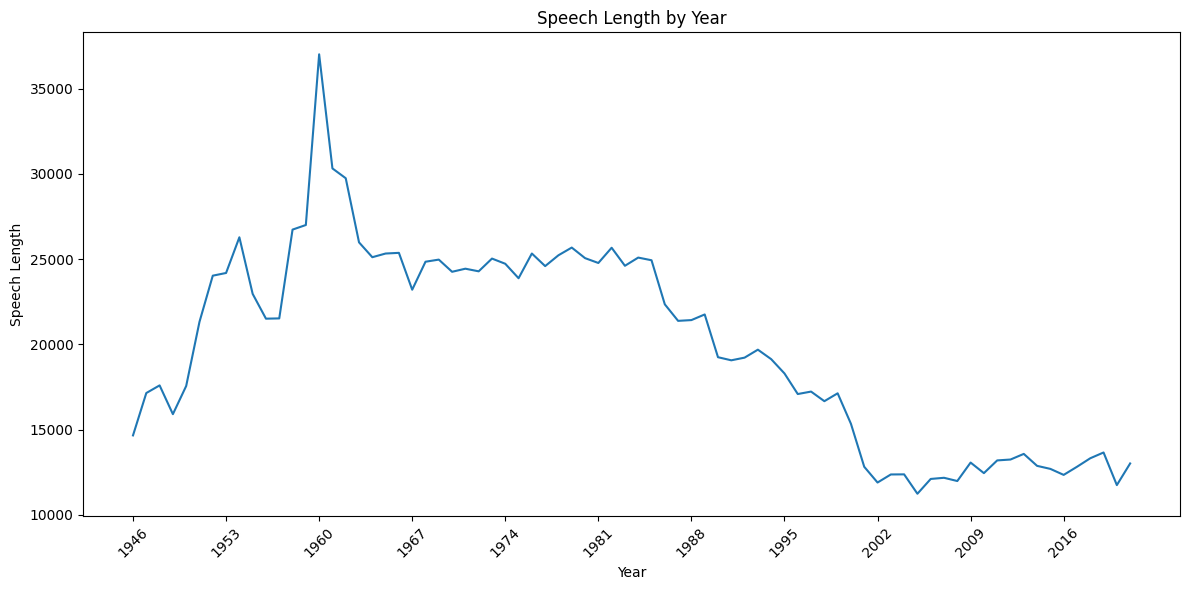

In [53]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a line plot
plt.plot(speech_length_by_year.index, speech_length_by_year.values)

# Set the x-axis label and title
plt.xlabel('Year')
plt.ylabel('Speech Length')
plt.title('Speech Length by Year')

# Rotate x-axis tick labels
plt.xticks(rotation=45)
# Set the number of x-axis ticks and their spacing
num_ticks = 10
x_ticks = range(0, len(speech_length_by_year.index), len(speech_length_by_year.index)//num_ticks)
x_labels = speech_length_by_year.index[x_ticks]
plt.xticks(x_ticks, x_labels)

plt.tight_layout()


# Display the plot
plt.show()

In [54]:
eu_rows = df[df['iso'] == 'EU']
len(eu_rows)

11

In [58]:
eu_rows=eu_rows.sort_values('year')
eu_rows.head(12)

,iso,year,speeches,country_dup,Name of Person Speaking,Post,order,country,speech_length
7126,EU,2011,Europe presents to you a message of \n coopera...,NaN,NaN,NaN,NaN,European Union,12046
8139,EU,2012,﻿The advance of democracy has taken place in\n...,European Union,Herman Van Rompuy,President,1999.0,European Union,11542
4103,EU,2013,A year ago \n when we met in the General Assem...,NaN,NaN,NaN,NaN,European Union,11726
10376,EU,2014,The world today is much more dangerous than \n...,NaN,NaN,NaN,NaN,European Union,10843
1406,EU,2015,I am here today to reassure the General Assemb...,European Union,Mr. Donald Tusk,President,1417.0,European Union,6031
2735,EU,2016,"Last year, I stood here to assure the General ...",European Union,Mr. Donald Tusk,President of the European Council,1209.0,European Union,6257
5215,EU,2017,The European Union (EU) stands for freedom and...,European Union,Mr. Donald Tusk,President of the European Council,1017.0,European Union,7060
135,EU,2018,The European Union is fighting intensely to pr...,European Union,Mr. Donald Tusk,President of the European Council,831.0,European Union,6788
8450,EU,2019,"Over the past five years, I have had the honou...",European Union,Mr. Donald Tusk,President of the European Council,665.0,European Union,4375
3359,EU,2020,"Mister President, Mister Secretary-General, de...",European Union,Mr. Charles Michel,President of the European Council,490.0,European Union,11825
